# Nova Financial Solutions - Exploratory Data Analysis (EDA)

## Data Cleaning and Processing

### Import Functions
In this section, import all necessary modules from the `shared` module to load and clean the raw dataset.

In [1]:

from IPython.display import display
from shared.dataset_loader import load_raw_dataset

from shared.data_cleaning import (
     date_to_datetime,
     handle_missing_values, 
     standardize_text,
     handle_duplicates,
     save_processed_dataset
)

# silence warnings
import warnings
warnings.filterwarnings('ignore')

### Load Raw Dataset
First, we need to load the raw dataset using the `load_raw_dataset` function. This function loads the data from a CSV file and returns a Pandas DataFrame.

In [2]:
raw_data = load_raw_dataset()
print("Data Type:")
print(raw_data['date'].dtype)
display(raw_data)

Data Type:
object


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


### Convert date to datetime
This function takes the raw dataset as input and converts any date columns to datetime format.

In [3]:
processed_data = date_to_datetime(raw_data)
print("DataType:")
print(processed_data['date'].dtype)
display(processed_data)

DataType:
datetime64[ns]


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaT,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaT,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaT,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaT,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaT,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX


### Handle missing values
The `handle_missing_values` function handles missing values in the dataset. It Drop rows with empty headline, url, date, stock columns and Replace empty row publisher column with Unknown.

In [4]:
# Call the handle_missing_values function on the processed dataset
processed_data = handle_missing_values(processed_data)
display(processed_data)

,Unnamed: 0,headline,url,publisher,date,stock
10,10,30 Stocks Moving in Friday's Pre-Market Session,https://www.benzinga.com/news/20/05/16092879/3...,Lisa Levin,2020-05-22,A
11,11,SVB Leerink Maintains Outperform on Agilent Te...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,2020-05-22,A
12,12,8 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/05/16089803/8...,Tyree Gorges,2020-05-21,A
13,13,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16089218/a...,Benzinga Newsdesk,2020-05-21,A
14,14,Agilent Technologies Q2 Adj. EPS $0.71 Beats $...,https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,2020-05-21,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX


### Standardize text
The `standardize_text` function is used to standardize text data in the dataset. It performs tasks such as converting text to lowercase, removing special characters or punctuation.

In [5]:
processed_data = standardize_text(processed_data)
print(processed_data['date'].dtype)
display(processed_data)

datetime64[ns]


,Unnamed: 0,headline,url,publisher,date,stock
10,10,30 stocks moving fridays premarket session,https://www.benzinga.com/news/20/05/16092879/3...,Lisa Levin,2020-05-22,A
11,11,svb leerink maintains outperform agilent techn...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,2020-05-22,A
12,12,8 stocks moving thursdays afterhours session,https://www.benzinga.com/news/20/05/16089803/8...,Tyree Gorges,2020-05-21,A
13,13,agilent technologies shares trading higher com...,https://www.benzinga.com/wiim/20/05/16089218/a...,Benzinga Newsdesk,2020-05-21,A
14,14,agilent technologies q2 adj eps 071 beats 061 ...,https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,2020-05-21,A
...,...,...,...,...,...,...
1407323,1413844,top narrow based indexes august 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX
1407324,1413845,recap wednesdays top percentage gainers losers,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX
1407325,1413846,update oppenheimer color china zenix auto init...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX
1407326,1413847,oppenheimer initiates china zenix outperform 8 pt,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX


### Handle duplicates
The `handle_duplicates` function deals with duplicate records in the dataset. It Check for duplicate rows based on the url column & Keep only the row with the latest date compared to all duplicate rows.

In [6]:
processed_data = handle_duplicates(processed_data)
print("DataType:")
print(processed_data['date'].dtype)
display(processed_data)

DataType:
datetime64[ns]


,Unnamed: 0,headline,url,publisher,date,stock
10,10,30 stocks moving fridays premarket session,https://www.benzinga.com/news/20/05/16092879/3...,Lisa Levin,2020-05-22,A
11,11,svb leerink maintains outperform agilent techn...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,2020-05-22,A
12,12,8 stocks moving thursdays afterhours session,https://www.benzinga.com/news/20/05/16089803/8...,Tyree Gorges,2020-05-21,A
13,13,agilent technologies shares trading higher com...,https://www.benzinga.com/wiim/20/05/16089218/a...,Benzinga Newsdesk,2020-05-21,A
14,14,agilent technologies q2 adj eps 071 beats 061 ...,https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,2020-05-21,A
...,...,...,...,...,...,...
1407323,1413844,top narrow based indexes august 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX
1407324,1413845,recap wednesdays top percentage gainers losers,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX
1407325,1413846,update oppenheimer color china zenix auto init...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX
1407326,1413847,oppenheimer initiates china zenix outperform 8 pt,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX


### Save processed dataset
The `save_processed_dataset` function allows to save the cleaned and preprocessed dataset to a CSV file. Create the output folder if it doesn't exist and Save the cleaned dataset.

In [7]:
import os
# Save the processed dataset
output_folder = os.path.join('..', 'notebooks', 'data') 
save_processed_dataset(processed_data, output_folder)
save_stock_price_dataset

Cleaned dataset saved to ..\notebooks\data\cleaned_analyst_ratings_dataset.csv


'..\\notebooks\\data\\cleaned_analyst_ratings_dataset.csv'

## Data Analysis using the Cleaned Dataset

### Import Functions
In this section, import all necessary functions from the `shared` module for loading the cleaned dataset and perfom analysis.

In [1]:

from IPython.display import display
import matplotlib.pyplot as plt

from shared.dataset_loader import load_cleaned_dataset

from shared.descriptive_analysis import (
     get_text_length_stats,
     count_articles_per_publisher,
     identify_unique_domains
)
from shared.inferential_analysis import (
     analyze_publication_dates,

)
from shared.data_visualization import (
     visualize_publication_dates,
     plot_text_length_stats,
     plot_publisher_counts,
     plot_domain_frequency,
     visualize_stock_prices
)
from shared.sentiment_analysis import (
     perform_sentiment_analysis,
)
from shared.stock_price_loader import (
     fetch_stock_prices

)
from shared.correlation_analysis import (
     align_datasets
)

# silence warnings
import warnings
warnings.filterwarnings('ignore')

### Load Cleaned Dataset
First, we need to load the cleaned dataset using the `load_cleaned_dataset` function. This function loads the data from a CSV file and returns a Pandas DataFrame.

In [2]:
cleaned_data = load_cleaned_dataset()
display(cleaned_data)

,Unnamed: 0,headline,url,publisher,date,stock
0,10,30 stocks moving fridays premarket session,https://www.benzinga.com/news/20/05/16092879/3...,Lisa Levin,2020-05-22,A
1,11,svb leerink maintains outperform agilent techn...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,2020-05-22,A
2,12,8 stocks moving thursdays afterhours session,https://www.benzinga.com/news/20/05/16089803/8...,Tyree Gorges,2020-05-21,A
3,13,agilent technologies shares trading higher com...,https://www.benzinga.com/wiim/20/05/16089218/a...,Benzinga Newsdesk,2020-05-21,A
4,14,agilent technologies q2 adj eps 071 beats 061 ...,https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,2020-05-21,A
...,...,...,...,...,...,...
1351336,1413844,top narrow based indexes august 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX
1351337,1413845,recap wednesdays top percentage gainers losers,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX
1351338,1413846,update oppenheimer color china zenix auto init...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX
1351339,1413847,oppenheimer initiates china zenix outperform 8 pt,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX


## Descriptive Statistical Analysis
In this section, we define functions that perform Descriptive statistical data analysis tasks on a iven dataset.


### Text length stats

This function calculates various statistics related to the length of the headlines in the given dataset. It takes the dataset as input and returns a dictionary with the following statistics:

- `mean`: The mean length of the headlines.
- `median`: The median length of the headlines.
- `minimum`: The minimum length of the headlines.
- `maximum`: The maximum length of the headlines.
- `standard_deviation`: The standard deviation of the lengths of the headlines.


In [4]:
stats = get_text_length_stats(cleaned_data)
print("Headline Length Statistics:")
display(stats)

Headline Length Statistics:


{'mean': 61.92729063543641,
 'median': 55.0,
 'minimum': 2.0,
 'maximum': 429.0,
 'standard_deviation': 32.38855218927757}

### Plot Text length stats

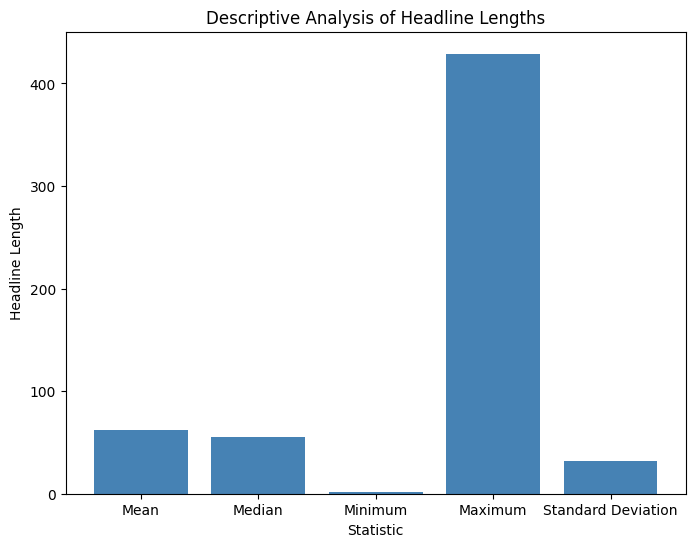

In [5]:
plot_text_length_stats(stats)

### Number of Articles/Publisher

In [6]:
publisher_counts = count_articles_per_publisher(cleaned_data)
display(publisher_counts)

publisher
Paul Quintaro        224161
Lisa Levin           174571
Benzinga Newsdesk    135734
Charles Gross         94942
Monica Gerson         81769
                      ...  
Eric Martin               1
Jose Rodrigo              1
CannabisFN                1
janaviktoria              1
Jeremie Capron            1
Name: count, Length: 1029, dtype: int64

### Plot number of articles per publisher

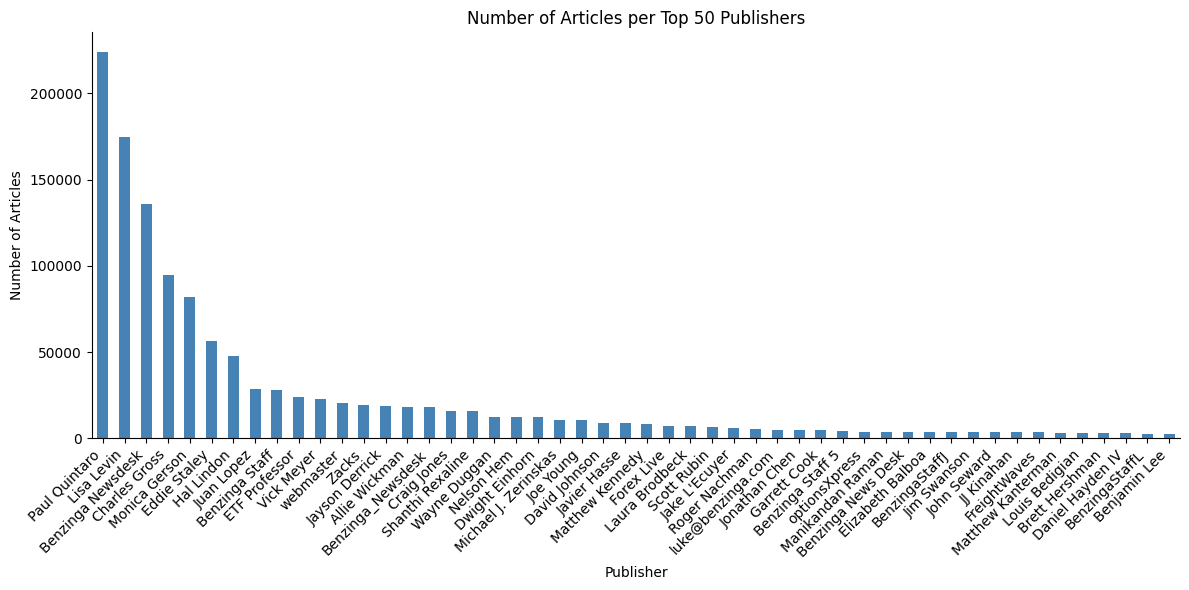

In [7]:
plot_publisher_counts(publisher_counts)

### Identifying Unique Domains

In [3]:
unique_domains = identify_unique_domains(cleaned_data)
# Print the results
print("Unique Domains:")
display(unique_domains)

Unique Domains:


array(['', 'benzinga', 'gmail', 'andyswan', 'investdiva', 'eosdetroit',
       'tothetick', 'forextraininggroup', 'stockmetrix'], dtype=object)

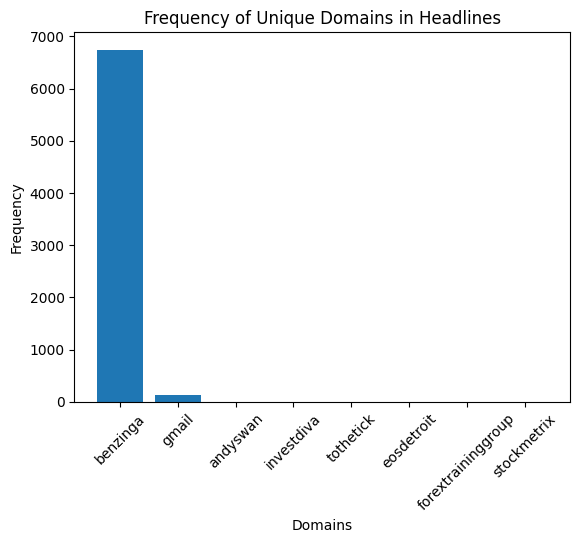

In [4]:
plot_domain_frequency(cleaned_data)

### Analyzing the Publication Dates
Analyze the publication dates in the dataset to identify trends over time

In [5]:
news_frequency, news_frequency_monthly = analyze_publication_dates(cleaned_data)

News Frequency by Day of the Week:
day
0    254841
1    285468
2    289049
3    289906
4    208511
5      7486
6     16078
Name: headline, dtype: int64
News Frequency by Month and Year:
year  month
2009  2            1
      4            3
      5           12
      6           40
      7           75
               ...  
2020  2        16523
      3        20314
      4        16141
      5         8659
      6          457
Name: headline, Length: 136, dtype: int64


### Plot Publicattion Dates

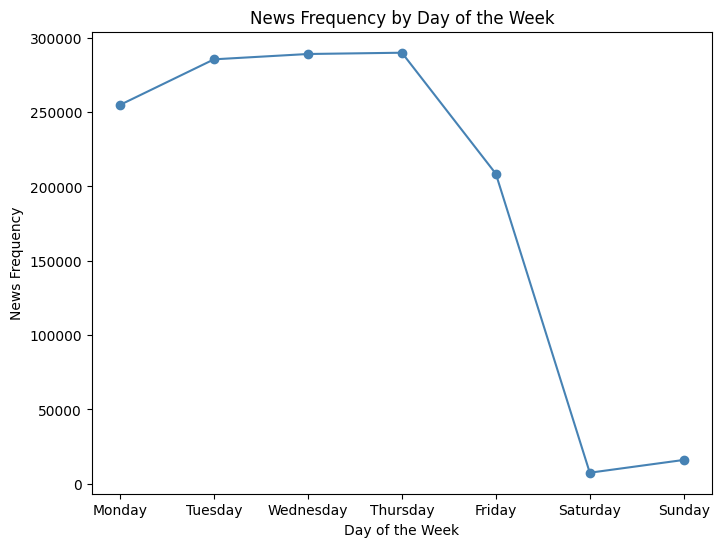

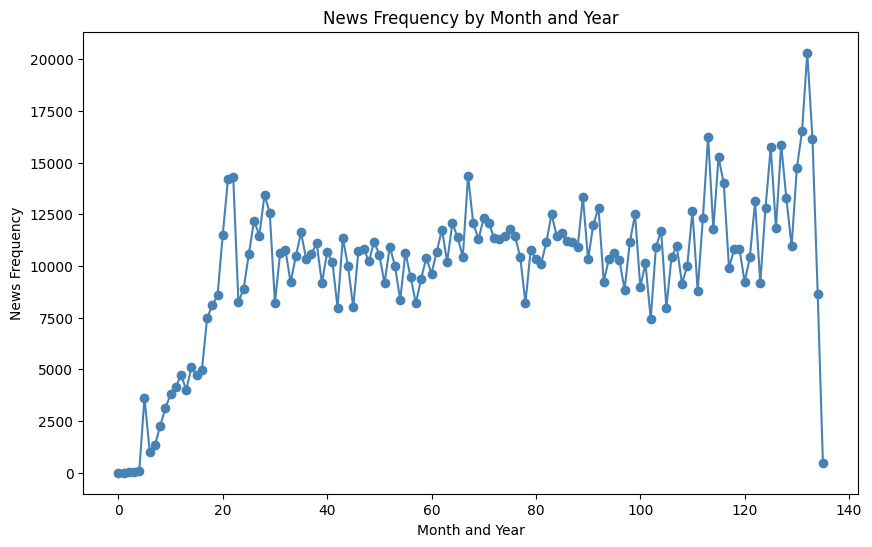

In [6]:
visualize_publication_dates(news_frequency, news_frequency_monthly)

### Sentiment Analysis on Headlines

In [3]:
sentiment_scores = perform_sentiment_analysis(cleaned_data)
display(sentiment_scores)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Unnamed: 0,headline,url,publisher,date,stock,sentiment_score
0,10,30 stocks moving fridays premarket session,https://www.benzinga.com/news/20/05/16092879/3...,Lisa Levin,2020-05-22,A,0.0000
1,11,svb leerink maintains outperform agilent techn...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,2020-05-22,A,0.0000
2,12,8 stocks moving thursdays afterhours session,https://www.benzinga.com/news/20/05/16089803/8...,Tyree Gorges,2020-05-21,A,0.0000
3,13,agilent technologies shares trading higher com...,https://www.benzinga.com/wiim/20/05/16089218/a...,Benzinga Newsdesk,2020-05-21,A,0.2960
4,14,agilent technologies q2 adj eps 071 beats 061 ...,https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,2020-05-21,A,0.0000
...,...,...,...,...,...,...,...
1351336,1413844,top narrow based indexes august 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX,0.2023
1351337,1413845,recap wednesdays top percentage gainers losers,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX,-0.3818
1351338,1413846,update oppenheimer color china zenix auto init...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX,0.0000
1351339,1413847,oppenheimer initiates china zenix outperform 8 pt,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX,0.0000


###  Fetching Stock Price & Applying Analysis Indicators with TA-Lib

In [5]:
TICKER = "TSLA"
stock_data = fetch_stock_prices(TICKER)
display(stock_data)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3481,2024-04-29 00:00:00-04:00,188.419998,198.869995,184.539993,194.050003,243869700,0.0,0.0
3482,2024-04-30 00:00:00-04:00,186.979996,190.949997,182.839996,183.279999,127031800,0.0,0.0
3483,2024-05-01 00:00:00-04:00,182.000000,185.860001,179.009995,179.990005,92829700,0.0,0.0
3484,2024-05-02 00:00:00-04:00,182.860001,184.600006,176.020004,180.009995,89148000,0.0,0.0


In [8]:
cols = stock_data.columns
print(cols)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


### Visualizing Stock Price Dataset

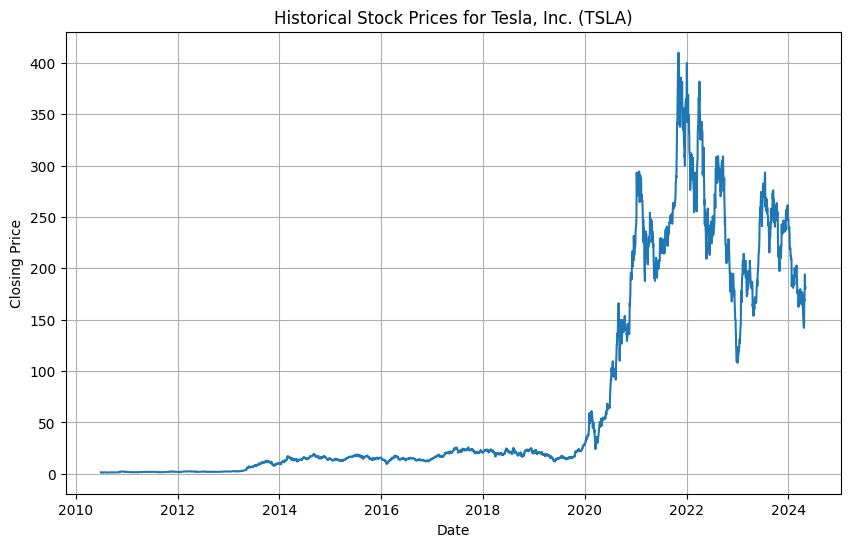

In [6]:
visualize_stock_prices(stock_data, TICKER )

In [6]:
ali = align_datasets(sentiment_scores,stock_data )
display(ali)

TypeError: Already tz-aware, use tz_convert to convert.